Множественная линейная регрессия на чистых данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x = pd.read_csv("0_x.csv", header=None)
y = pd.read_csv("0_y.csv", header=None)

In [6]:
x.shape, y.shape

((387, 5), (387, 1))

In [7]:
from sklearn.linear_model import LinearRegression

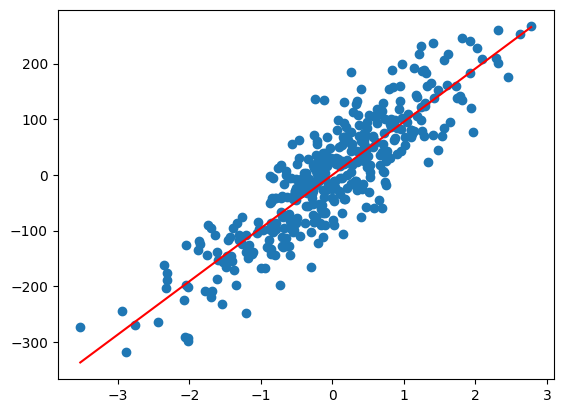

In [12]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_
binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [13]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

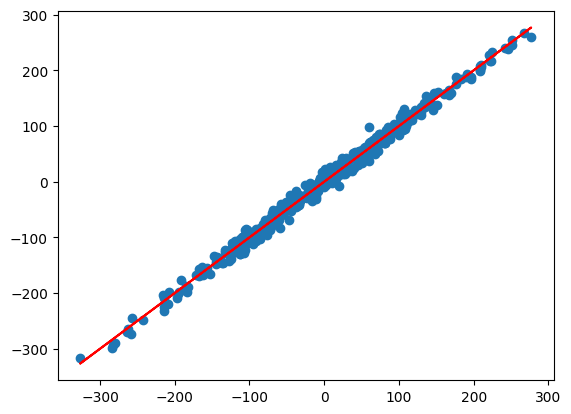

In [14]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

**Задание 1.** Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

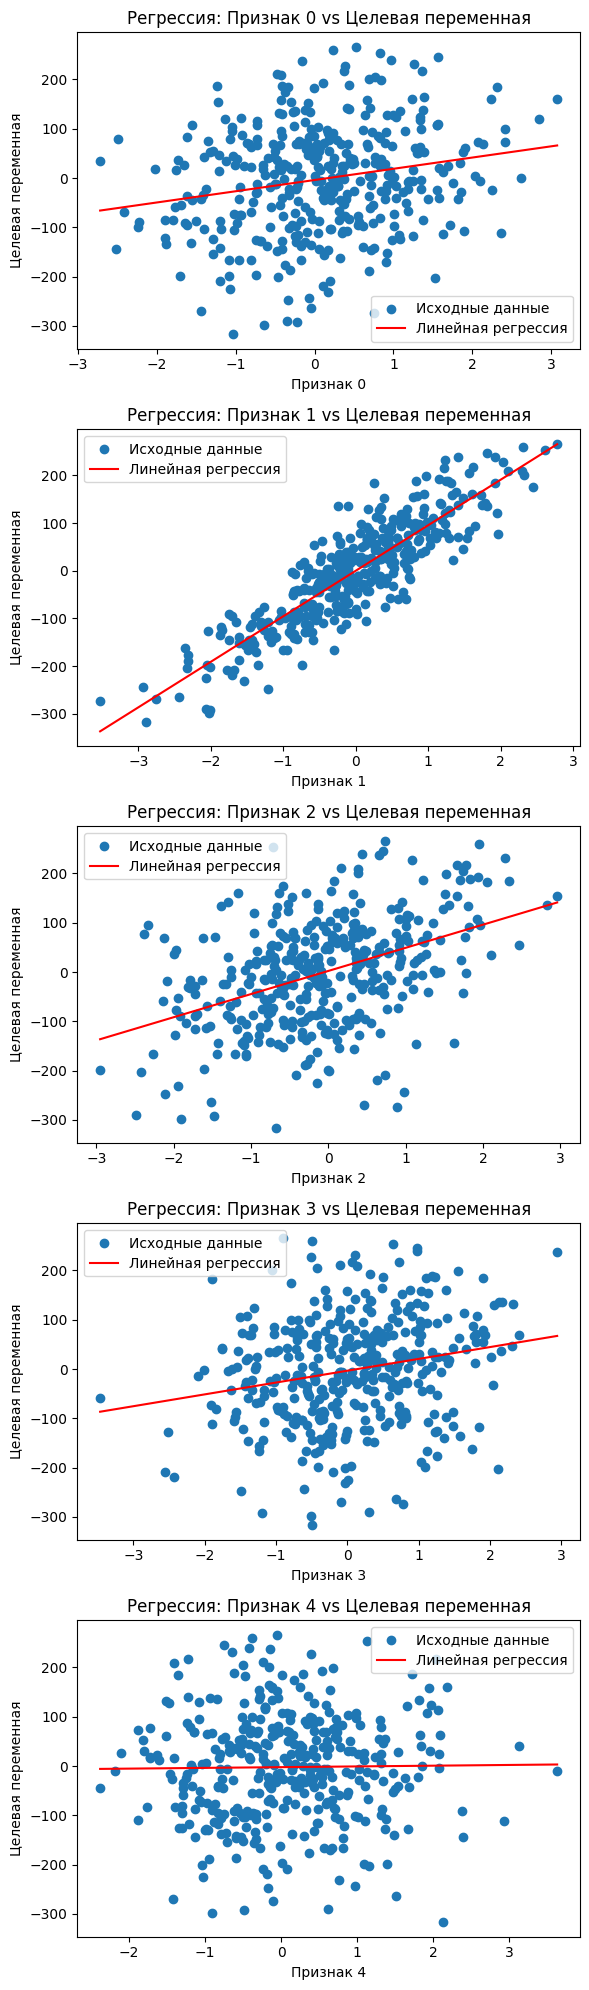

In [15]:
num_features = x.shape[1]

# Построение парных регрессий
fig, axes = plt.subplots(num_features, 1, figsize=(6, 4 * num_features))
if num_features == 1:
    axes = [axes]  # Делаем axes списком, если у нас всего один график

for i in range(num_features):
    model = LinearRegression()
    model.fit(x[[i]], y)

    # Предсказания
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    yy_pred = model.predict(xx)

    # Визуализация
    ax = axes[i]
    ax.scatter(x[i], y, label="Исходные данные")
    ax.plot(xx, yy_pred, color='red', label="Линейная регрессия")
    ax.set_xlabel(f"Признак {i}")
    ax.set_ylabel("Целевая переменная")
    ax.legend()
    ax.set_title(f"Регрессия: Признак {i} vs Целевая переменная")

plt.tight_layout()
plt.show()

**Задание 2.** (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

✅ Ошибка стабилизировалась, завершение на шаге 988. Ошибка: 46.79942654125069
Финальная ошибка: 46.79942654125069


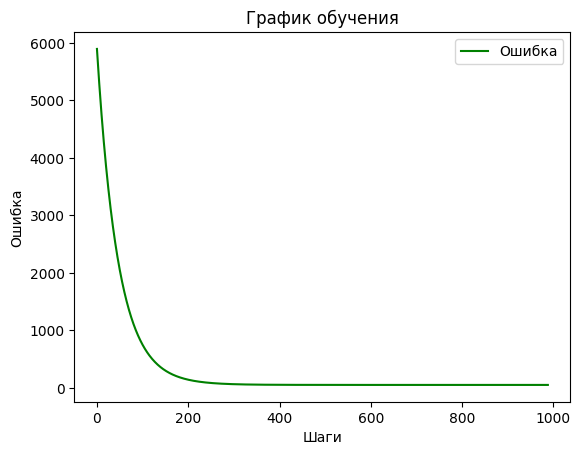

In [16]:
class MultiLinearRegression:
    """Модель множественной линейной регрессии"""

    def __init__(self):
        self.weights = None  # Вектор коэффициентов
        self.bias = 0  # Смещение

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def error(self, X, Y):
        return np.mean((self.predict(X) - Y) ** 2) / 2

    def fit(self, X, Y, alpha=0.01, tolerance=1e-6, max_steps=10000):
        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)

        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features, 1))
        self.bias = 0

        prev_error = float('inf')
        steps, errors = [], []

        for step in range(max_steps):
            predictions = self.predict(X)

            dW = np.dot(X.T, (predictions - Y)) / num_samples
            dB = np.mean(predictions - Y)

            self.weights -= alpha * dW
            self.bias -= alpha * dB

            current_error = self.error(X, Y)
            steps.append(step)
            errors.append(current_error)

            if abs(prev_error - current_error) < tolerance:
                print(f"✅ Ошибка стабилизировалась, завершение на шаге {step}. Ошибка: {current_error}")
                break
            prev_error = current_error

        return steps, errors

    def plot_learning_curve(self, steps, errors):
        plt.figure()
        plt.plot(steps, errors, 'g', label='Ошибка')
        plt.xlabel('Шаги')
        plt.ylabel('Ошибка')
        plt.title('График обучения')
        plt.legend()
        plt.show()

# Загрузка данных
x = pd.read_csv('0_x.csv')  # X - несколько признаков
y = pd.read_csv('0_y.csv')  # Y - целевая переменная

# Проверка, что X содержит только числовые данные
if isinstance(x, pd.DataFrame):
    x = x.select_dtypes(include=[np.number])

# Создание и обучение модели
model = MultiLinearRegression()
steps, errors = model.fit(x, y)

# Вывод ошибки после обучения
print("Финальная ошибка:", model.error(x, y))

# График обучения
model.plot_learning_curve(steps, errors)

**Задание 3.** Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

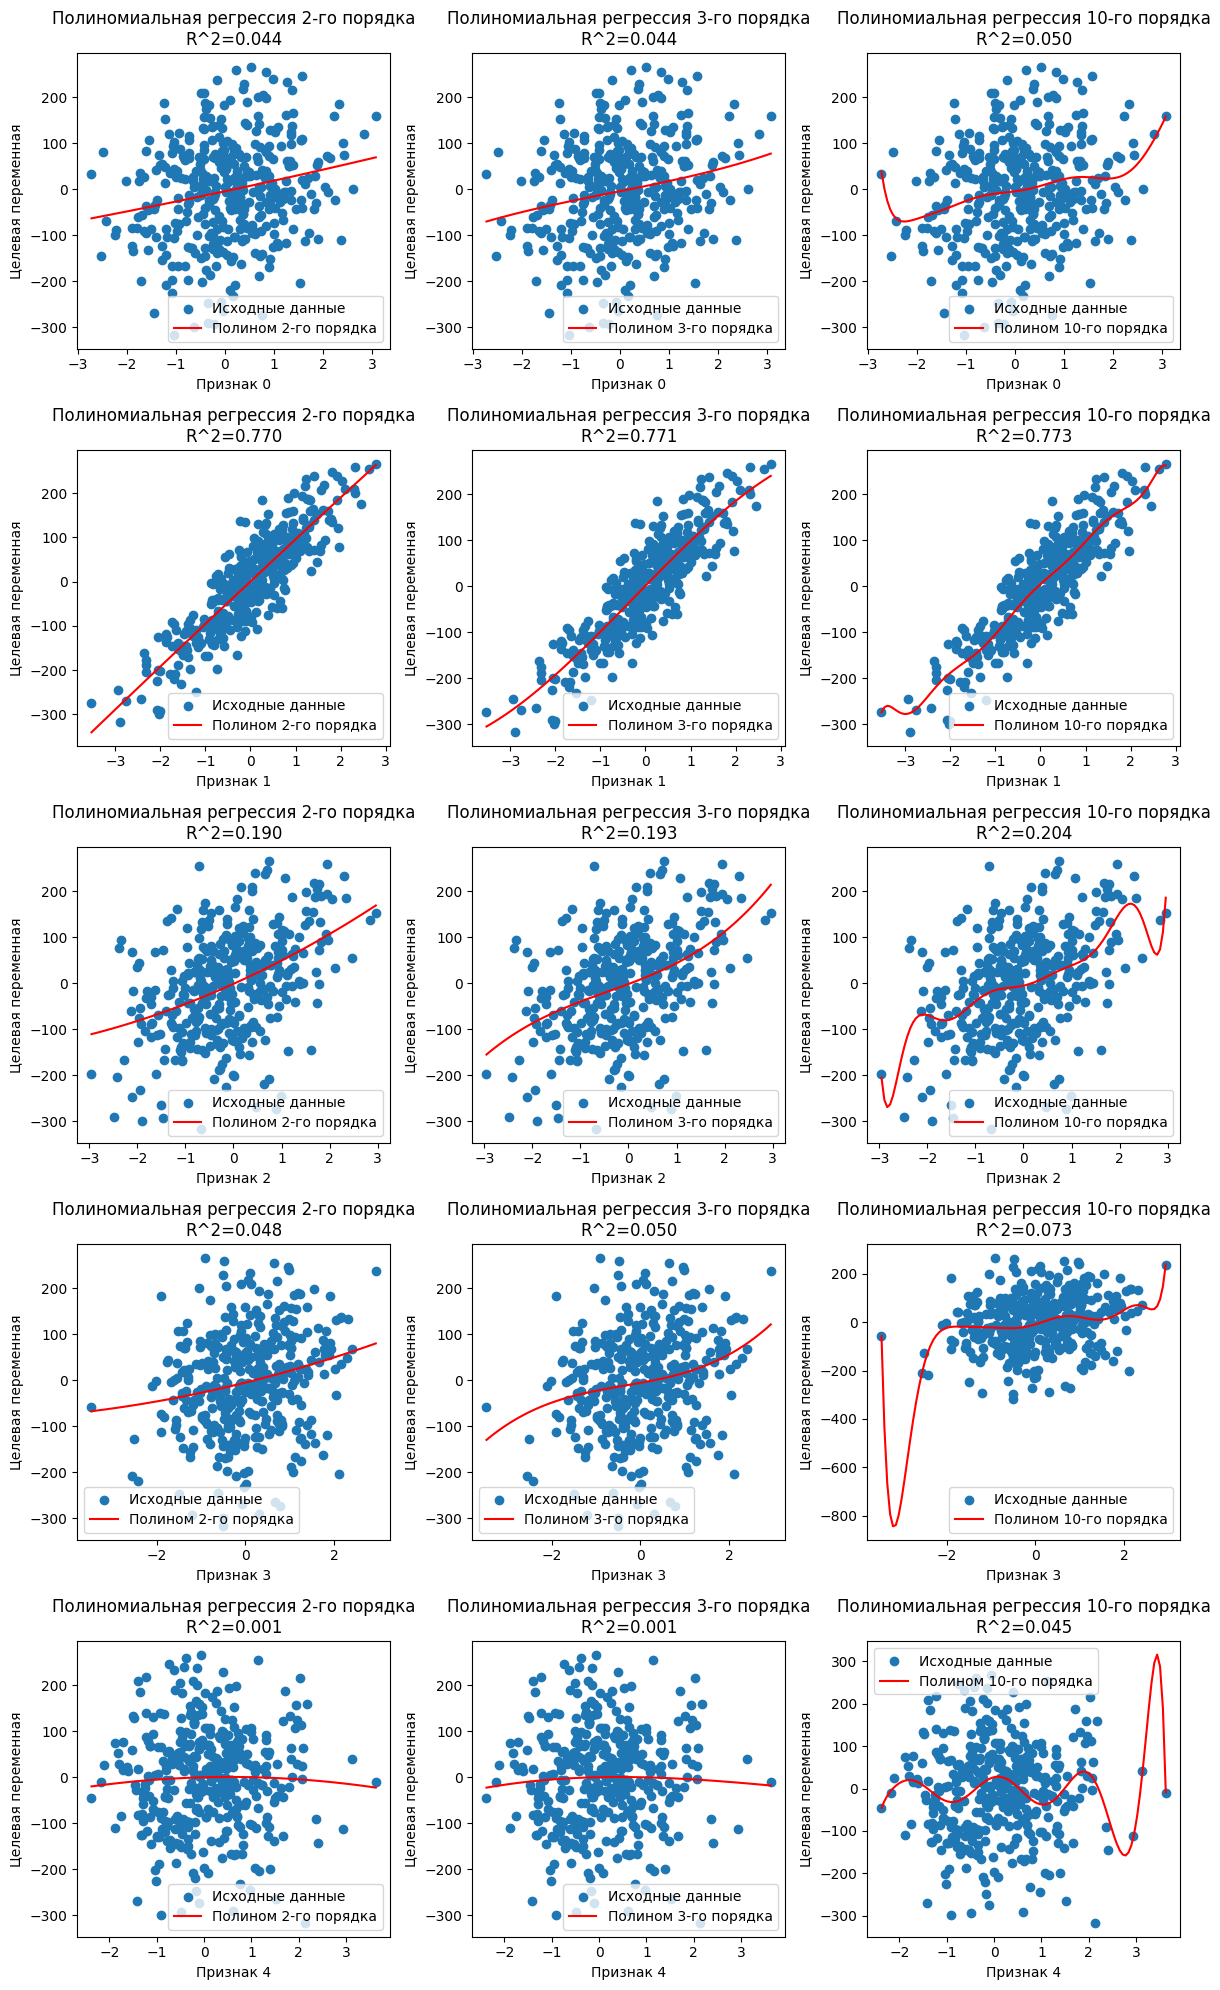

Средний R^2 для полинома 2-го порядка: 0.211
Средний R^2 для полинома 3-го порядка: 0.212
Средний R^2 для полинома 10-го порядка: 0.229


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Загрузка данных
x = pd.read_csv("0_x.csv", header=None)
y = pd.read_csv("0_y.csv", header=None)

# Количество признаков
num_features = x.shape[1]

# Степени полиномиальной регрессии
degrees = [2, 3, 10]

# Построение полиномиальных регрессий
fig, axes = plt.subplots(num_features, len(degrees), figsize=(12, 4 * num_features))
if num_features == 1:
    axes = [axes]  # Делаем axes списком, если у нас всего один признак

r2_scores = {degree: [] for degree in degrees}

for i in range(num_features):
    for j, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree)
        x_poly = poly.fit_transform(x[[i]])
        model = LinearRegression()
        model.fit(x_poly, y)

        # Предсказания
        xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
        xx_poly = poly.transform(xx)
        yy_pred = model.predict(xx_poly)

        # Оценка модели
        y_pred_train = model.predict(x_poly)
        r2 = r2_score(y, y_pred_train)
        r2_scores[degree].append(r2)

        # Визуализация
        ax = axes[i][j] if num_features > 1 else axes[j]
        ax.scatter(x[i], y, label="Исходные данные")
        ax.plot(xx, yy_pred, color='red', label=f"Полином {degree}-го порядка")
        ax.set_xlabel(f"Признак {i}")
        ax.set_ylabel("Целевая переменная")
        ax.legend()
        ax.set_title(f"Полиномиальная регрессия {degree}-го порядка\nR^2={r2:.3f}")

plt.tight_layout()
plt.show()

# Вывод значимости регрессий
for degree in degrees:
    print(f"Средний R^2 для полинома {degree}-го порядка: {np.mean(r2_scores[degree]):.3f}")


Полиномиальная регрессия не даёт значимого улучшения при увеличении степени
полинома.

**Низкий 𝑅^2.**
R
^2
  указывает на слабую зависимость между признаками и целевой переменной.

**Модель лучше оставить линейной или использовать 2-й порядок**, так как более сложные полиномы не дают значительного прироста точности.

**Рекомендуется проверить другие признаки или попробовать другие модели** (например, нелинейные методы машинного обучения) для улучшения предсказательной способности.

**Задание 4.** Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

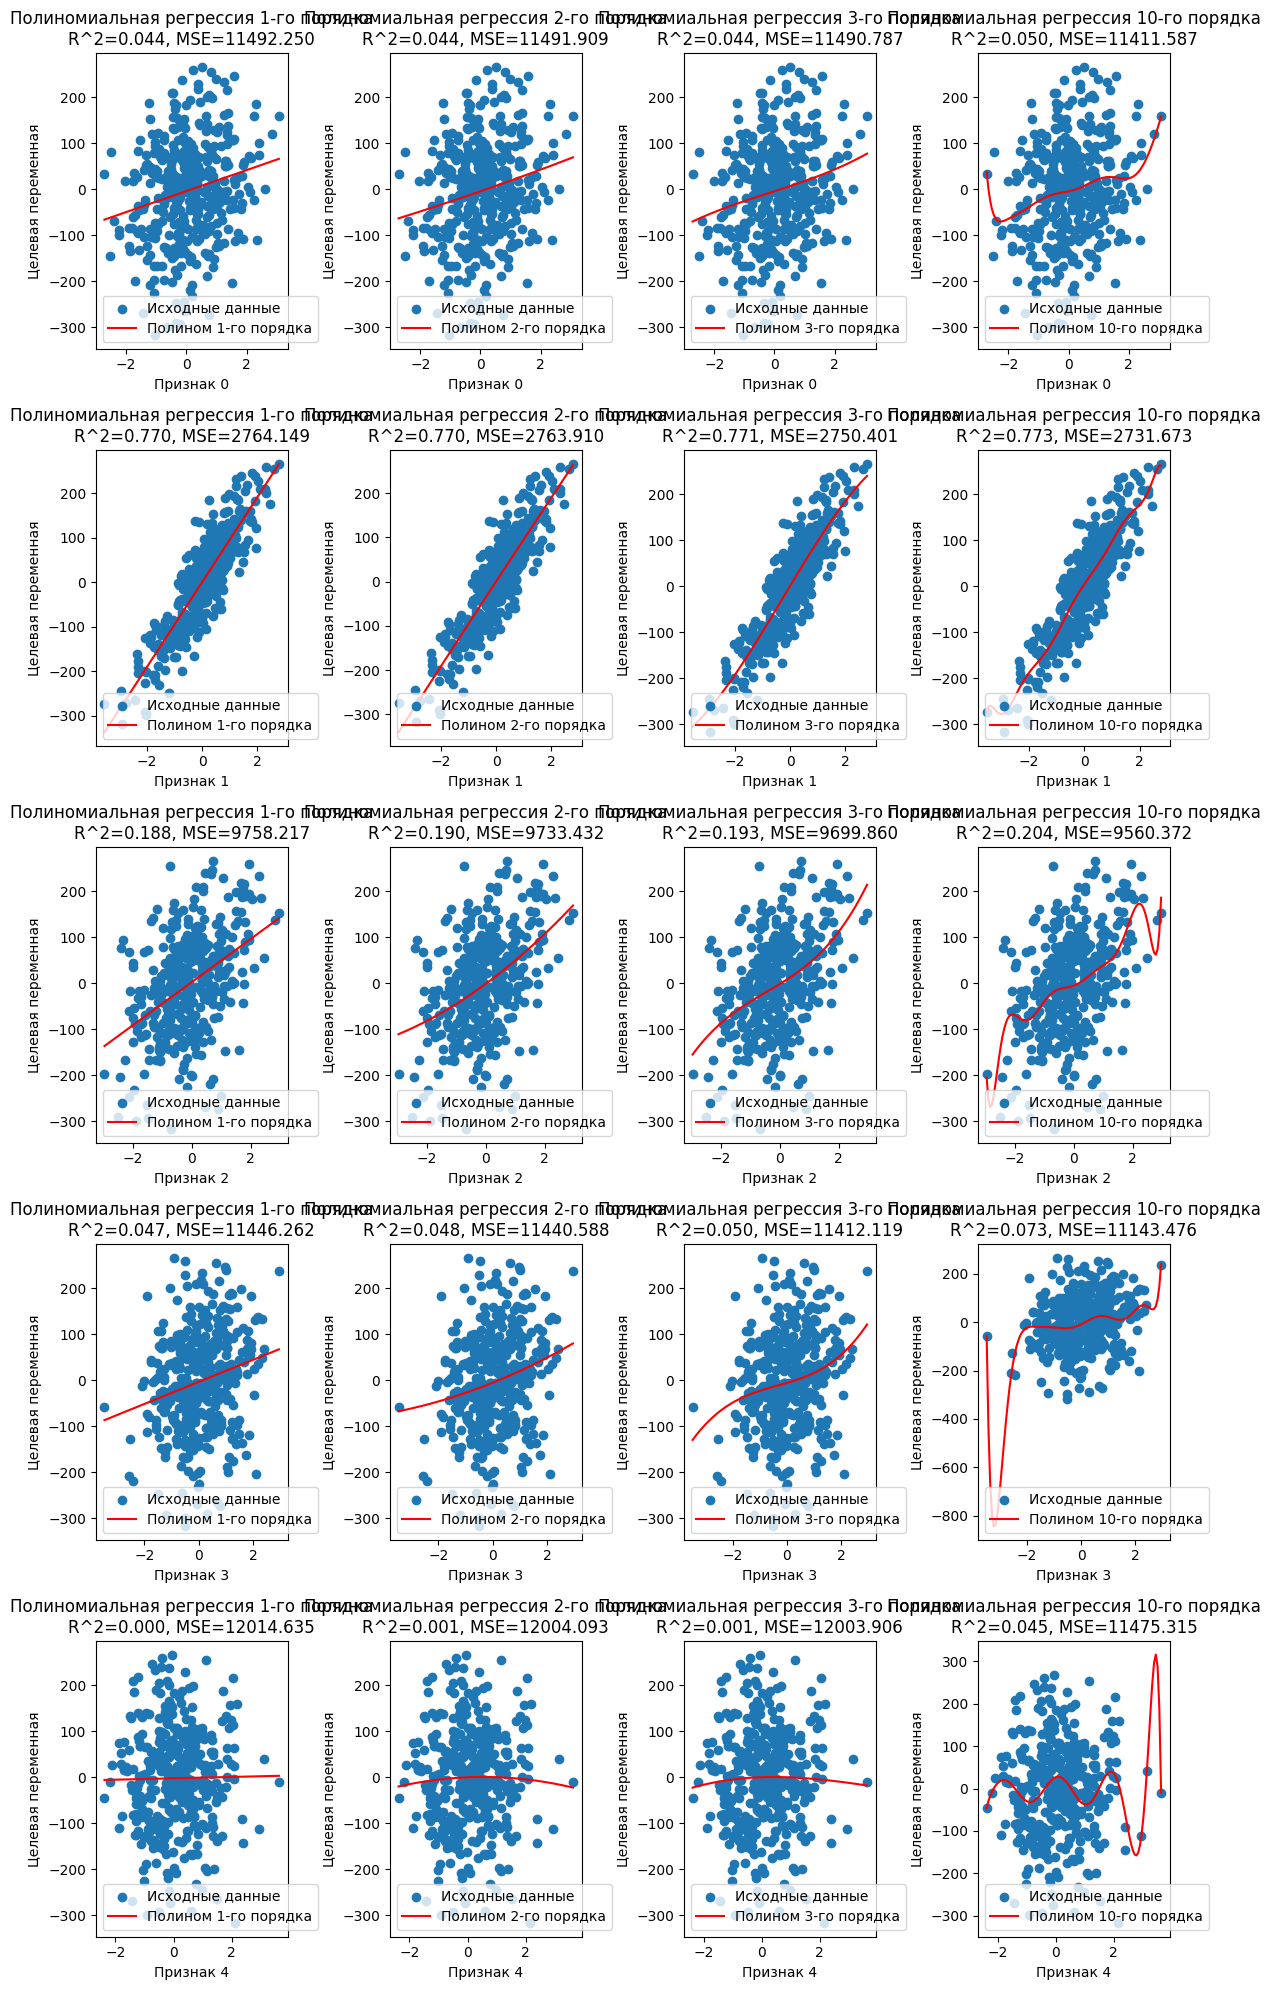

    Признак  Степень полинома       R^2           MSE
0         0                 1  0.043643  11492.249825
1         0                 2  0.043672  11491.909255
2         0                 3  0.043765  11490.787323
3         0                10  0.050356  11411.586520
4         1                 1  0.769974   2764.149252
5         1                 2  0.769994   2763.909753
6         1                 3  0.771118   2750.401156
7         1                10  0.772677   2731.672893
8         2                 1  0.187945   9758.217057
9         2                 2  0.190008   9733.431563
10        2                 3  0.192802   9699.859735
11        2                10  0.204409   9560.372197
12        3                 1  0.047470  11446.262118
13        3                 2  0.047943  11440.588266
14        3                 3  0.050312  11412.119234
15        3                10  0.072667  11143.475913
16        4                 1  0.000172  12014.634966
17        4                 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Загрузка данных
x = pd.read_csv("0_x.csv", header=None)
y = pd.read_csv("0_y.csv", header=None)

# Количество признаков
num_features = x.shape[1]

# Степени полиномиальной регрессии
degrees = [1, 2, 3, 10]

# Таблица показателей точности
results = []

# Построение полиномиальных регрессий
fig, axes = plt.subplots(num_features, len(degrees), figsize=(12, 4 * num_features))
if num_features == 1:
    axes = [axes]  # Делаем axes списком, если у нас всего один признак

for i in range(num_features):
    for j, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree)
        x_poly = poly.fit_transform(x[[i]])
        model = LinearRegression()
        model.fit(x_poly, y)

        # Предсказания
        y_pred_train = model.predict(x_poly)
        r2 = r2_score(y, y_pred_train)
        mse = mean_squared_error(y, y_pred_train)

        # Сохранение результатов
        results.append([i, degree, r2, mse])

        # Визуализация
        xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
        xx_poly = poly.transform(xx)
        yy_pred = model.predict(xx_poly)

        ax = axes[i][j] if num_features > 1 else axes[j]
        ax.scatter(x[i], y, label="Исходные данные")
        ax.plot(xx, yy_pred, color='red', label=f"Полином {degree}-го порядка")
        ax.set_xlabel(f"Признак {i}")
        ax.set_ylabel("Целевая переменная")
        ax.legend()
        ax.set_title(f"Полиномиальная регрессия {degree}-го порядка\nR^2={r2:.3f}, MSE={mse:.3f}")

plt.tight_layout()
plt.show()

# Вывод сводной таблицы
results_df = pd.DataFrame(results, columns=["Признак", "Степень полинома", "R^2", "MSE"])
print(results_df)

# Вывод о переобучении и недообучении
for degree in degrees:
    avg_r2 = results_df[results_df["Степень полинома"] == degree]["R^2"].mean()
    avg_mse = results_df[results_df["Степень полинома"] == degree]["MSE"].mean()
    print(f"Средний R^2 для полинома {degree}-го порядка: {avg_r2:.3f}, Средний MSE: {avg_mse:.3f}")

# Анализ моделей
print("\nАнализ моделей:")
print("- Если R^2 низкий, а MSE высокий, модель недообучена (не выявляет закономерности в данных).")
print("- Если R^2 высок при 10-м порядке, но MSE тоже возрастает, модель переобучена (подстраивается под шум).")
print("- Оптимальная модель имеет умеренный R^2 и невысокий MSE.")


**Задание 5.** Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

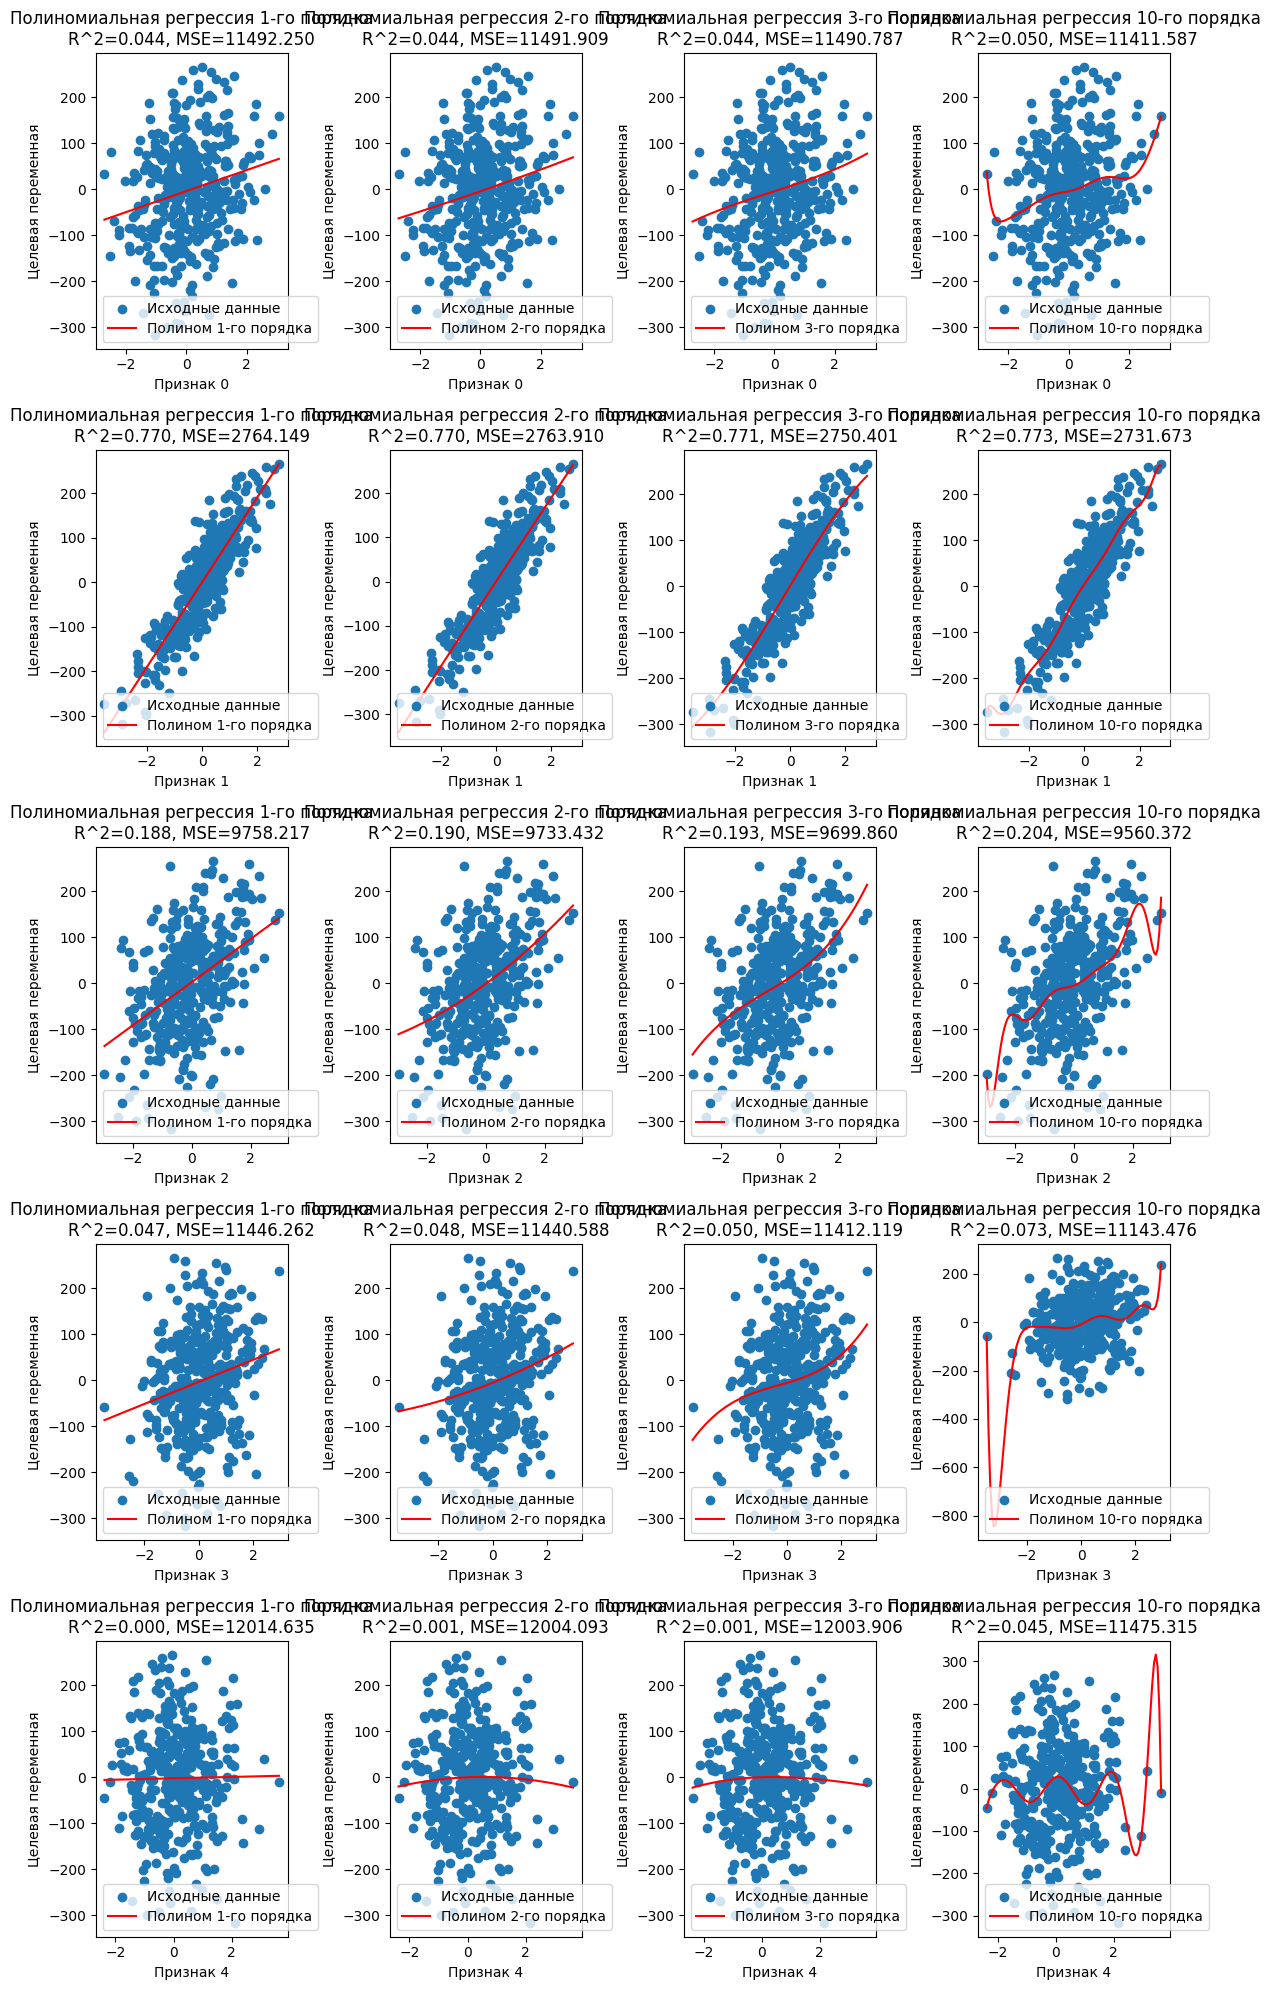

    Признак  Степень полинома       R^2           MSE        MAE      MAPE
0         0                 1  0.043643  11492.249825  85.765870  1.472156
1         0                 2  0.043672  11491.909255  85.778988  1.481656
2         0                 3  0.043765  11490.787323  85.684404  1.490421
3         0                10  0.050356  11411.586520  84.854224  1.518449
4         1                 1  0.769974   2764.149252  42.131562  1.635493
5         1                 2  0.769994   2763.909753  42.132303  1.633665
6         1                 3  0.771118   2750.401156  42.061248  1.685776
7         1                10  0.772677   2731.672893  41.690871  1.638591
8         2                 1  0.187945   9758.217057  77.411837  1.964023
9         2                 2  0.190008   9733.431563  77.458415  1.994298
10        2                 3  0.192802   9699.859735  77.570200  1.894037
11        2                10  0.204409   9560.372197  76.815422  1.824210
12        3              

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Загрузка данных
x = pd.read_csv("0_x.csv", header=None)
y = pd.read_csv("0_y.csv", header=None)

# Количество признаков
num_features = x.shape[1]

# Степени полиномиальной регрессии
degrees = [1, 2, 3, 10]

# Таблица показателей точности
results = []

# Построение полиномиальных регрессий
fig, axes = plt.subplots(num_features, len(degrees), figsize=(12, 4 * num_features))
if num_features == 1:
    axes = [axes]  # Делаем axes списком, если у нас всего один признак

for i in range(num_features):
    for j, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree)
        x_poly = poly.fit_transform(x[[i]])
        model = LinearRegression()
        model.fit(x_poly, y)

        # Предсказания
        y_pred_train = model.predict(x_poly)
        r2 = r2_score(y, y_pred_train)
        mse = mean_squared_error(y, y_pred_train)
        mae = mean_absolute_error(y, y_pred_train)
        mape = mean_absolute_percentage_error(y, y_pred_train)

        # Сохранение результатов
        results.append([i, degree, r2, mse, mae, mape])

        # Визуализация
        xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
        xx_poly = poly.transform(xx)
        yy_pred = model.predict(xx_poly)

        ax = axes[i][j] if num_features > 1 else axes[j]
        ax.scatter(x[i], y, label="Исходные данные")
        ax.plot(xx, yy_pred, color='red', label=f"Полином {degree}-го порядка")
        ax.set_xlabel(f"Признак {i}")
        ax.set_ylabel("Целевая переменная")
        ax.legend()
        ax.set_title(f"Полиномиальная регрессия {degree}-го порядка\nR^2={r2:.3f}, MSE={mse:.3f}")

plt.tight_layout()
plt.show()

# Вывод сводной таблицы
results_df = pd.DataFrame(results, columns=["Признак", "Степень полинома", "R^2", "MSE", "MAE", "MAPE"])
print(results_df)

# Вывод о переобучении и недообучении
for degree in degrees:
    avg_r2 = results_df[results_df["Степень полинома"] == degree]["R^2"].mean()
    avg_mse = results_df[results_df["Степень полинома"] == degree]["MSE"].mean()
    avg_mae = results_df[results_df["Степень полинома"] == degree]["MAE"].mean()
    avg_mape = results_df[results_df["Степень полинома"] == degree]["MAPE"].mean()
    print(f"Средние метрики для полинома {degree}-го порядка: R^2={avg_r2:.3f}, MSE={avg_mse:.3f}, MAE={avg_mae:.3f}, MAPE={avg_mape:.3f}")

# Анализ моделей
print("\nАнализ моделей:")
print("- Если R^2 низкий, а MSE, MAE и MAPE высокие, модель недообучена (не выявляет закономерности в данных).")
print("- Если R^2 высок при 10-м порядке, но MSE, MAE или MAPE тоже возрастают, модель переобучена (подстраивается под шум).")
print("- Оптимальная модель имеет умеренный R^2 и невысокие MSE, MAE, MAPE.")

**Задание 6. ** (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

Время обучения для полинома степени 1: 0.0027 секунд
Время обучения для полинома степени 2: 0.0029 секунд
Время обучения для полинома степени 3: 0.0051 секунд
Время обучения для полинома степени 4: 0.0135 секунд
Время обучения для полинома степени 5: 0.0508 секунд


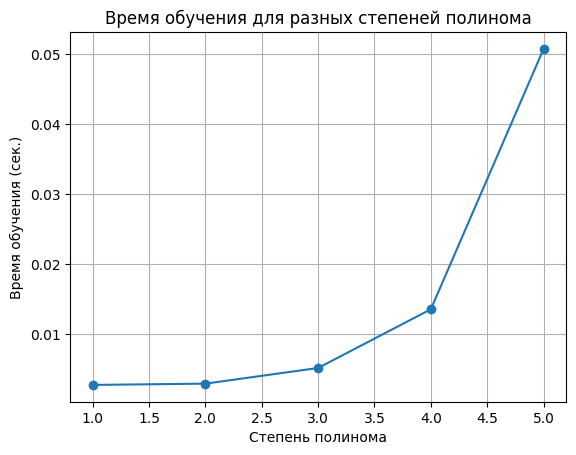

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import time

# Загрузка данных
x = pd.read_csv("0_x.csv", header=None)
y = pd.read_csv("0_y.csv", header=None)

# Функция для измерения времени обучения
def measure_training_time(degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()

    start_time = time.time()  # Начало замера времени
    model.fit(x_poly, y)
    end_time = time.time()  # Конец замера времени

    return end_time - start_time

# Замер времени для разных степеней полинома
degrees = [1, 2, 3, 4, 5]
times = []

for degree in degrees:
    training_time = measure_training_time(degree)
    times.append(training_time)
    print(f"Время обучения для полинома степени {degree}: {training_time:.4f} секунд")

# Визуализация результатов
plt.plot(degrees, times, marker='o')
plt.title("Время обучения для разных степеней полинома")
plt.xlabel("Степень полинома")
plt.ylabel("Время обучения (сек.)")
plt.grid(True)
plt.show()


**Малые степени полинома (1 и 2):** Время обучения практически одинаково и очень короткое. Это связано с тем, что модели с низкими степенями полинома имеют меньше признаков, и поэтому обучение происходит быстрее.

**Средние степени полинома (3 и 4):** Время обучения начинает заметно увеличиваться. Для полинома степени 4 модель уже обучается гораздо дольше, чем для степени 2. Это объясняется тем, что для более высоких степеней создается больше новых признаков, что увеличивает сложность модели и время ее обучения.

**Высокая степень полинома (5):** Время обучения значительно увеличивается. Это связано с тем, что для полинома степени 5 создаются дополнительные признаки, и модель становится гораздо более сложной. Также высокие степени полинома могут приводить к переобучению (overfitting), так как модель начинает слишком точно подстраиваться под данные, что делает ее более чувствительной к шуму.